In [1]:
# cmap = sns.diverging_palette(220, 10, as_cmap=True) - cmap for corrplots

# Introduction

### Data set information

In this paper, authors look for to recognize the causes of users tend to cyber space in Kohkiloye and Boyer Ahmad Province in Iran. Collecting information to form database is done by questionnaire. This questionnaire is provided as oral, written and also programming of a website which includes an internet questionnaire and the users can answer the questions as they wish. They entered their used websites, blogs and social networks during the day. After collecting questionnaires, the wed addresses are gathered to get expected results. And finally, their trustfulness is checked by analyzing their used web pages. As the results were same, for getting better and noiseless response, they will put in database. 

Then this information is used to predict future tendency anticipation of users to blogging. In order to get correct answer for their paper, authors classify bloggers to two
groups: professional bloggers and seasonal (temporary)
bloggers. Professional bloggers are those who adopt blog as
an effective digital media and interested in digital writing in
continuous time intervals. Seasonal (temporary) bloggers
are not professionals and follow blogging in discrete time
periods. 

### Problem description

In this report we have binary classification problem to solve. We want to classify if a blogger is a professional or not based on other parameters of a person, which will be listed later.

###  Target variable and features explanation

The noisy or too detailed data in database made authors far from to get proper and suitable answers of algorithms. That is why the dataset was preprocessed and some non-relevant data was eliminated before the dataset was published.

Authors of the paper considered following parameters as questions. Those parameters will be used as features for the model that will be created in this report:

* education (high, medium, low);
* political caprice (left, middle, right); 
* topics of the blog (impression, political, tourism, news, scientific);
* local media turnover (yes or no);
* local, political and social space (yes or no);



The following parameter is considered as target variable for the model:

* professional blogger (yes or no)

# Cleaning and preprocessing data

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import xgboost as xgb

### Import data to Python

In [3]:
full_data = pd.read_excel('kohkiloyeh.xlsx')

### Preprocessing

####  The shape of the dataset

before we can start the process of preprocessing of the data we want to see the initial shape of the data.

In [4]:
full_data.head()

,Degree,caprice,topic,lmt,lpss,pb
0,high,left,impression,yes,yes,yes
1,high,left,political,yes,yes,yes
2,medium,middle,tourism,yes,yes,yes
3,high,left,political,yes,yes,yes
4,medium,middle,news,yes,yes,yes


In [5]:
full_data.shape

(100, 6)

In [6]:
full_data.dtypes

Degree     object
caprice    object
topic      object
lmt        object
lpss       object
pb         object
dtype: object

In [7]:
full_data.describe()

,Degree,caprice,topic,lmt,lpss,pb
count,100,100,100,100,100,100
unique,3,3,5,2,2,2
top,medium,left,political,yes,yes,yes
freq,47,52,35,86,72,68


From the information above we can see, that there are only 100 observations and 6 parameters available (one of them is a target variable), the dataset is rather small. Another thing that we can notice is that all the data that we have is categorical data. 

#### Removing or imputing missing data

In [8]:
full_data.isna().any()

Degree     False
caprice    False
topic      False
lmt        False
lpss       False
pb         False
dtype: bool

As we can see above, this data set does not contain missing values, so there is no need to process the missing values in this data set.

#### One-hot encoding

In [9]:
full_data_dummies = pd.get_dummies(full_data)

In [10]:
full_data_dummies_corrected = full_data_dummies[['Degree_high', 'Degree_low', 'Degree_medium', 'caprice_left',
       'caprice_middle', 'caprice_right', 'topic_impression', 'topic_news',
       'topic_political', 'topic_scientific', 'topic_tourism',
       'lmt_yes', 'lpss_yes', 'pb_yes']]

In order to work with categorical type of data we need to encode it using label ore one hot encoding. In this report the one-hot encoding method was chosen because potentially this method can improve the performance of the classification model.

#### Standarization

Standarization of the data is not needed because our data contains only encoded categorical data.

# Exploratory Data Analysis

### Visualization of each feature

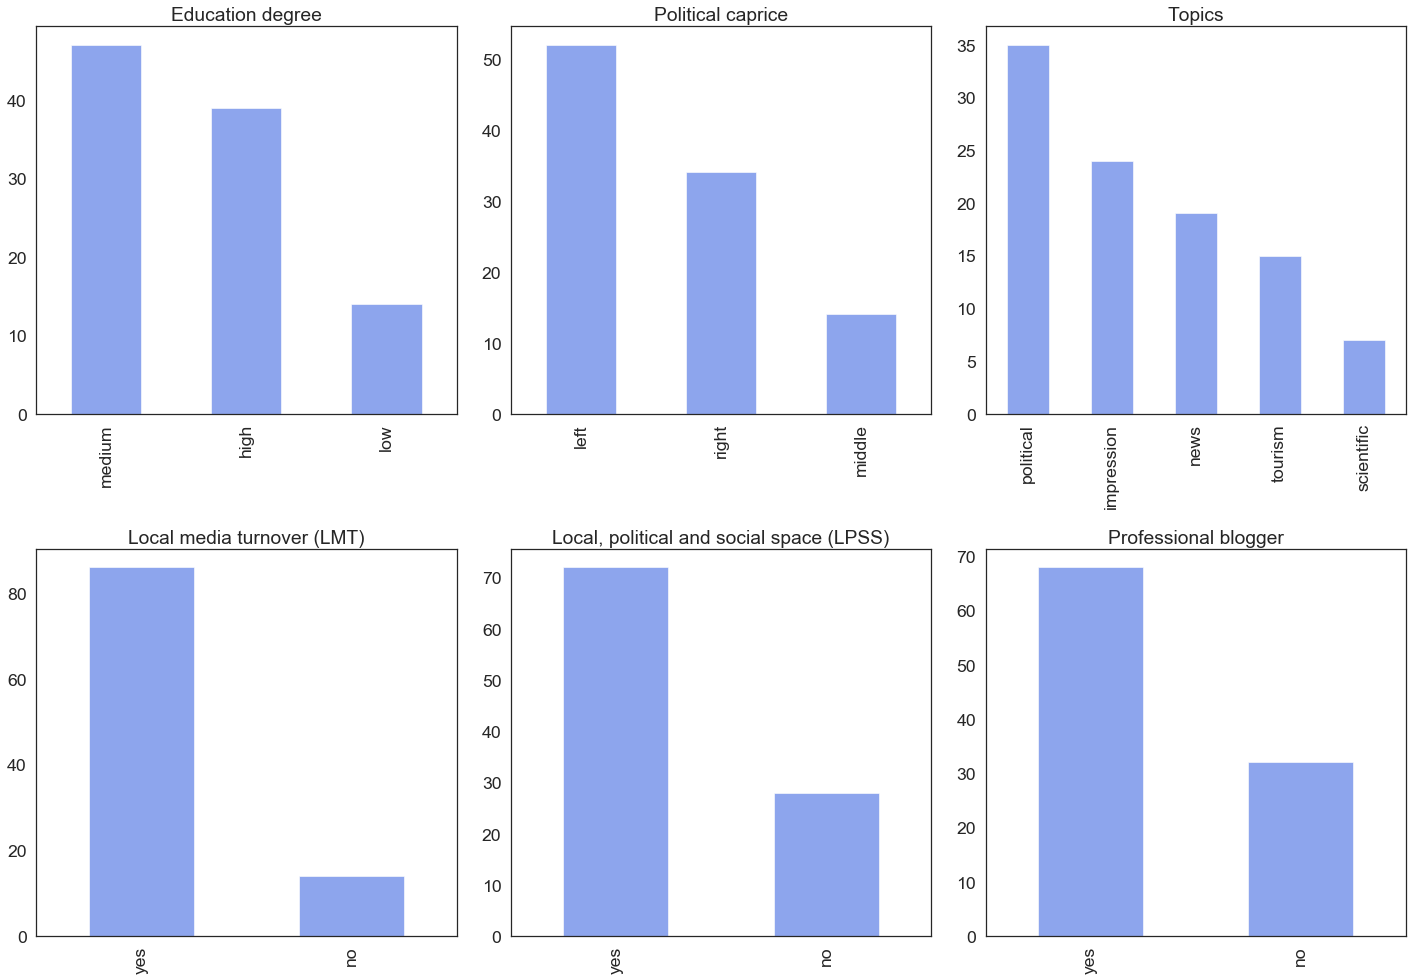

In [11]:
sns.set(font_scale = 1.6, style = "white")
figure, axes = plt.subplots(2, 3, figsize=(20,14))
full_data['Degree'].value_counts().plot(kind = 'bar', ax = axes[0,0], title = 'Education degree', alpha = 0.6, color = 'royalblue')
full_data['caprice'].value_counts().plot(kind = 'bar', ax = axes[0,1], title = 'Political caprice', alpha = 0.6, color = 'royalblue')
full_data['topic'].value_counts().plot(kind = 'bar', ax = axes[0,2], title = 'Topics', alpha = 0.6, color = 'royalblue')
full_data['lmt'].value_counts().plot(kind = 'bar', ax = axes[1,0], title = 'Local media turnover (LMT)', alpha = 0.6, color = 'royalblue')
full_data['lpss'].value_counts().plot(kind = 'bar', ax = axes[1,1], title = 'Local, political and social space (LPSS)', alpha = 0.6, color = 'royalblue')
full_data['pb'].value_counts().plot(kind = 'bar', ax = axes[1,2], title = 'Professional blogger', alpha = 0.6, color = 'royalblue')
figure.tight_layout()

As we can see abode our target variable (Professional blogger) is not very balanced. The other thing we can notice is that the shapes of 'the local media turnover'; 'local, political and social space' and 'professional blogger' variables look very similar.

### Visualization of the relationships between  features and target variable

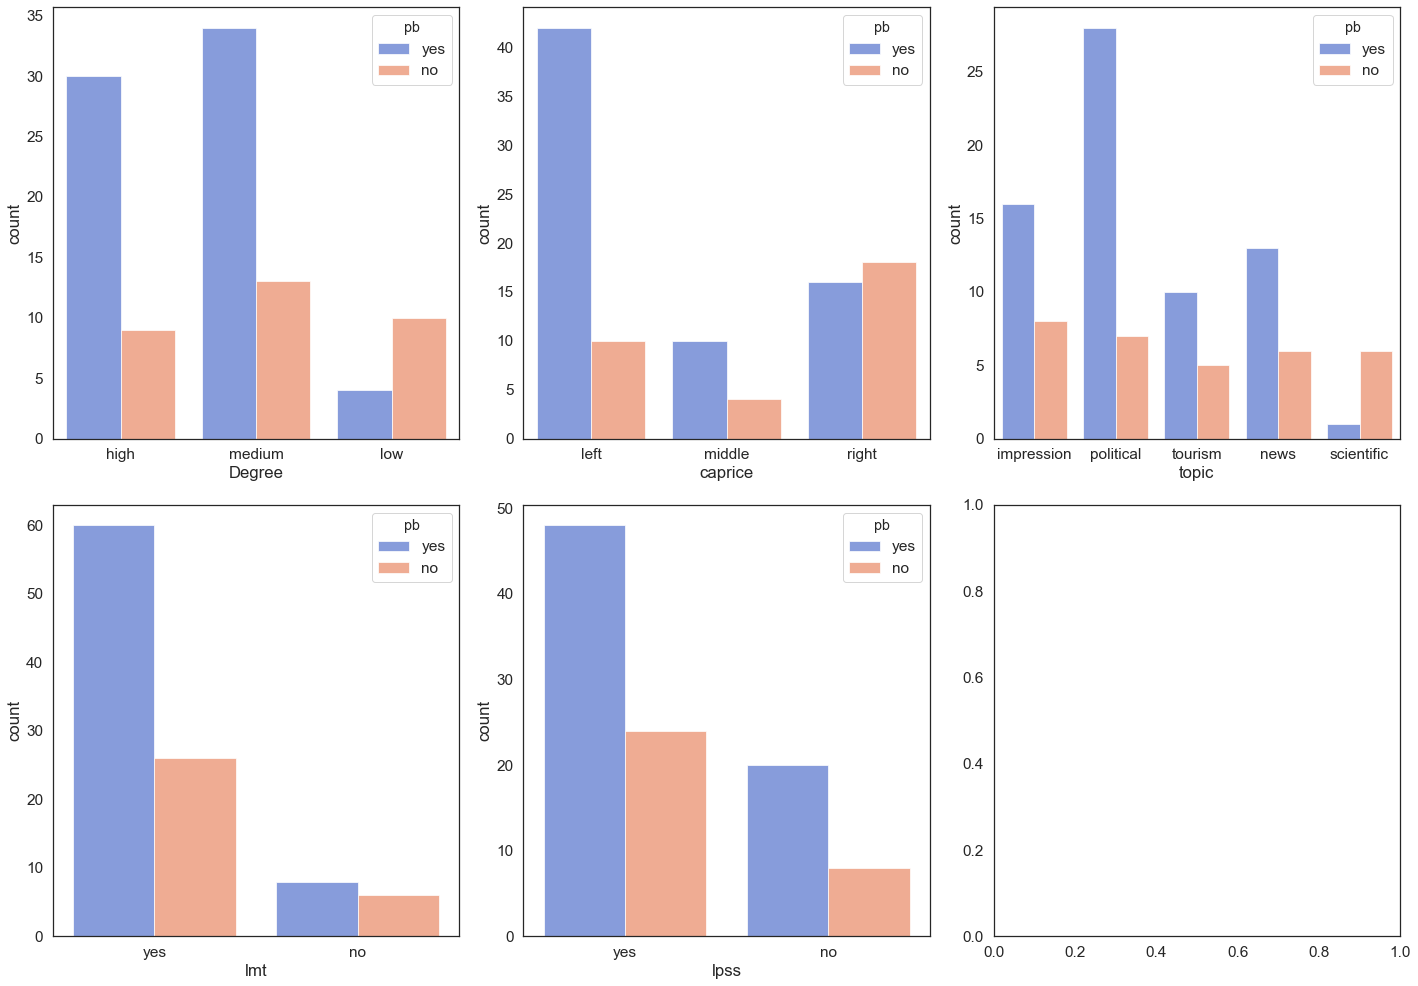

In [12]:
sns.set(font_scale = 1.4, style = "white")
figure, axes = plt.subplots(2, 3, figsize=(20,14))
sns.countplot(x = full_data['Degree'], hue = full_data['pb'], ax = axes[0,0], alpha = 0.7, palette = ['royalblue', 'coral'])
sns.countplot(x = full_data['caprice'], hue = full_data['pb'], ax = axes[0,1], alpha = 0.7, palette = ['royalblue', 'coral'])
sns.countplot(x = full_data['topic'], hue = full_data['pb'], ax = axes[0,2], alpha = 0.7, palette = ['royalblue', 'coral'])
sns.countplot(x = full_data['lmt'], hue = full_data['pb'], ax = axes[1,0], alpha = 0.7, palette = ['royalblue', 'coral'])
sns.countplot(x = full_data['lpss'], hue = full_data['pb'], ax = axes[1,1], alpha = 0.7, palette = ['royalblue', 'coral'])
figure.tight_layout()

Here we can see that Local media turnover (LMT) and Local, political and social space (LPSS) variables are closely related to the target variable. Moreover people with high and medium degree, letf political caprice and also people with political blogs are more likely to be professional bloggers than seasonal ones. Howewer if a person has low degree or has a blog about science, this person will be more likely not a professional blogger. That can mean that there is high connection between those parameters, which were mentioned above.

### Corrplot

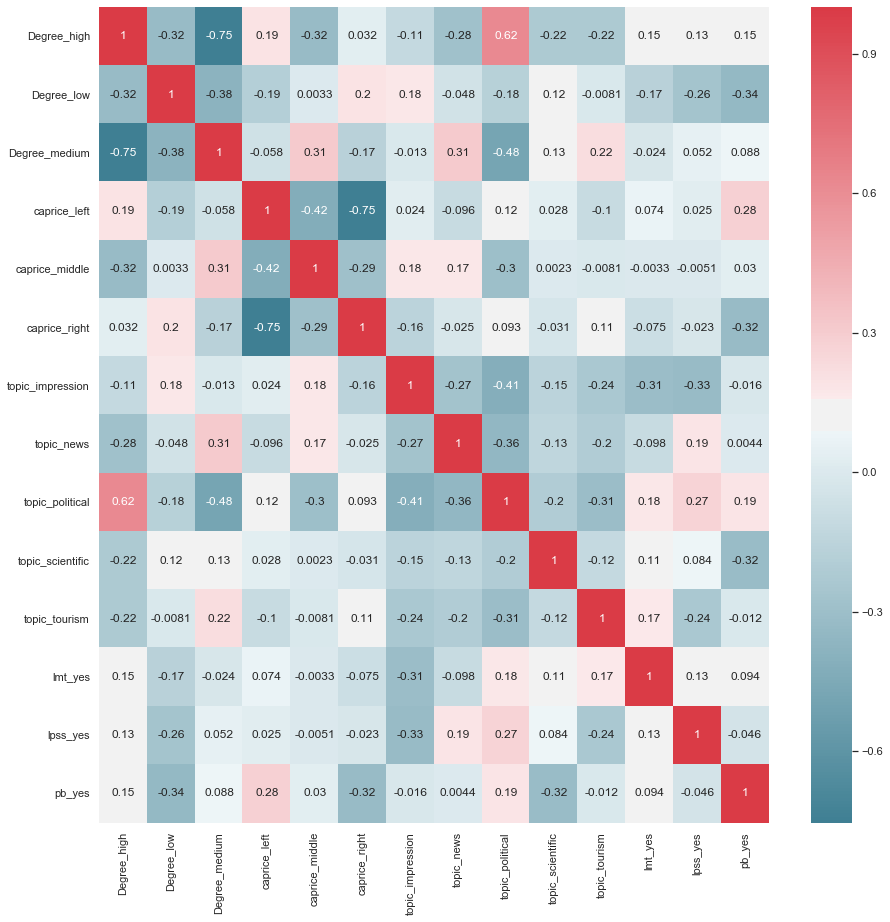

In [13]:
sns.set(font_scale = 1.0, style = "white")
data_correlations = full_data_dummies_corrected.corr()
plt.figure(figsize = (15,15))
sns.heatmap(data_correlations, annot = True, cmap = sns.diverging_palette(220, 10, as_cmap=True))

From correlation plot we can notice that there is high correlation between target variable and such variables as high or low degree, caprice left or right, political and scientific topics etc.

# Modeling and hyperparameter  tuning

### Splitting dataset to train and test subsets

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = full_data_dummies_corrected.drop(['pb_yes'], axis = 1)

In [16]:
y = full_data_dummies_corrected['pb_yes']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)

In order to solve classification task three classification models will be used in this report. In the next part of the report the performance of the models will be evaluated and compared.

#### Decision tree classifier

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
tree_params = {'max_depth': [3, 5, 6, 7, 8, 9, 10, 15, 20],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 3, 4, 5],
              'criterion': ['gini', 'entropy']}

In [21]:
my_tree_clf = DecisionTreeClassifier(random_state = 10)

Randomized search in order to find best set of hyperparameters:

In [22]:
randomized_search_tree = RandomizedSearchCV(my_tree_clf, tree_params, cv = 5, n_iter = 100) 

In [23]:
randomized_search_tree.fit(X, y)

C:\Users\danii\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=10,
                                                    splitter='best'),


Using best parameters obtained after randomized search create final decision tree model:

In [24]:
my_best_params_tree = randomized_search_tree.best_estimator_

In [25]:
my_best_params_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

Predictions:

In [26]:
y_pred_tree = my_best_params_tree.predict(X_test)

In [27]:
y_pred_tree_prob = my_best_params_tree.predict_proba(X_test) # for k-fold cross validation

check basic performance metrisc of the model:

In [28]:
print('Accuracy of the model: {}'.format(accuracy_score(y_test, y_pred_tree)))

Accuracy of the model: 0.9


In [29]:
confusion_matrix(y_test, y_pred_tree)

array([[ 6,  0],
       [ 2, 12]], dtype=int64)

k-fold cross validation accuracy score to improve choice of the model:

In [31]:
scores_tree = cross_val_score(my_best_params_tree, X, y, cv = 5)

In [33]:
print('Mean Accuracy of the model: {} \nStandard deviation: {}'.format(scores_tree.mean().round(3), scores_tree.std().round(3)))

Mean Accuracy of the model: 0.892 
Standard deviation: 0.068


#### Random forest classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
forest_params = {'bootstrap': [True, False],
                'n_estimators': [10, 30, 50, 70, 100, 150],
                'criterion' : ['gini', 'entropy'],
                'max_depth': [3, 5, 7, 9, 11],
                'min_samples_leaf': [1, 2, 4],
                'min_samples_split': [2, 3, 4, 5],
                }

In [135]:
my_random_forest_clf = RandomForestClassifier(random_state = 10)

Randomized search in order to find best set of hyperparameters:

In [136]:
randomized_search_forest = RandomizedSearchCV(my_random_forest_clf, forest_params, cv = 5, n_iter = 100)

In [137]:
randomized_search_forest.fit(X, y)

C:\Users\danii\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [39]:
#pd.DataFrame({'feature': X.columns ,'score':my_random_forest_clf.feature_importances_}).sort_values(by = 'score', ascending=False)

Using best parameters obtained after randomized search create final random forest model:

In [138]:
my_best_params_forest = randomized_search_forest.best_estimator_

In [139]:
my_best_params_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

Predictions:

In [140]:
y_pred_forest = my_best_params_forest.predict(X_test)

In [141]:
y_pred_forest_proba = my_best_params_forest.predict_proba(X_test) #for k-fold cross validation

check basic performance metrisc of the model:

In [142]:
print('Accuracy of the model: {}'.format(accuracy_score(y_test, y_pred_forest)))

Accuracy of the model: 0.9


In [143]:
confusion_matrix(y_test, y_pred_forest)

array([[ 6,  0],
       [ 2, 12]], dtype=int64)

k-fold cross validation accuracy score to improve choice of the model:

In [144]:
scores_forest = cross_val_score(my_best_params_forest, X, y, cv = 5)

In [145]:
print('Mean Accuracy of the model: {} \nStandard deviation: {}'.format(scores_forest.mean().round(3), scores_forest.std().round(3)))

Mean Accuracy of the model: 0.882 
Standard deviation: 0.07


#### Xgboost classifier

In [48]:
my_xgboost = xgb.XGBClassifier()

In [49]:
my_xgboost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Predictions:

In [50]:
y_pred_xgboost = my_xgboost.predict(X_test)

In [51]:
y_pred_xgboost_proba = my_xgboost.predict_proba(X_test) #for k-fold cross validation

In [52]:
accuracy_score(y_test, y_pred_xgboost)

0.8

In [53]:
confusion_matrix(y_test, y_pred_xgboost)

array([[ 4,  2],
       [ 2, 12]], dtype=int64)

k-fold cross validation accuracy score to improve choice of the model:

In [54]:
scores_xgboost = cross_val_score(my_xgboost, X, y, cv = 5)

In [55]:
print('Mean Accuracy of the model: {} \nStandard deviation: {}'.format(scores_xgboost.mean().round(3), scores_xgboost.std().round(3)))

Mean Accuracy of the model: 0.851 
Standard deviation: 0.086


# Graphical and descriptive model assessment

In order to choose the best model in this part all classification models that were created earlier will be compared based on:

* accuracy from k-fold cross validation (with 5 folds)
* F1 score
* ROC curve
* AUC score

### Accuracy of each model

In [67]:
print('Mean Accuracy of the decision tree model: {} \nStandard deviation: {}'.format(scores_tree.mean().round(3), scores_tree.std().round(3)))

Mean Accuracy of the decision tree model: 0.892 
Standard deviation: 0.068


In [146]:
print('Mean Accuracy of the random forest model: {} \nStandard deviation: {}'.format(scores_forest.mean().round(3), scores_forest.std().round(3)))

Mean Accuracy of the random forest model: 0.882 
Standard deviation: 0.07


In [69]:
print('Mean Accuracy of the Xgboost model: {} \nStandard deviation: {}'.format(scores_xgboost.mean().round(3), scores_xgboost.std().round(3)))

Mean Accuracy of the Xgboost model: 0.851 
Standard deviation: 0.086


The best performed model here is simple decision tree model with the highest accuracy score of **0.892** 

### F1 score

In [77]:
from sklearn.metrics import f1_score

In [112]:
f1_scores = [f1_score(y_test, y_list).round(3) for y_list in [y_pred_tree, y_pred_forest, y_pred_xgboost]] 

In [149]:
pd.DataFrame({'Model' :['Decision tree', 'Random forest', 'Xgboost'], 'Score': f1_scores},).sort_values(by = 'Score', ascending = False)

,Model,Score
0,Decision tree,0.923
1,Random forest,0.923
2,Xgboost,0.857


Here we can see that Decision tree and Random forest models have two highest F1 scores of **0.923**

### ROC curve

In [56]:
from sklearn.metrics import roc_curve

In [57]:
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_pred_tree_prob[:,1])
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_test, y_pred_forest_proba[:,1])
fpr_xgboost, tpr_xgboost, thresholds_xgboost = roc_curve(y_test, y_pred_xgboost_proba[:,1])

(0, 1)

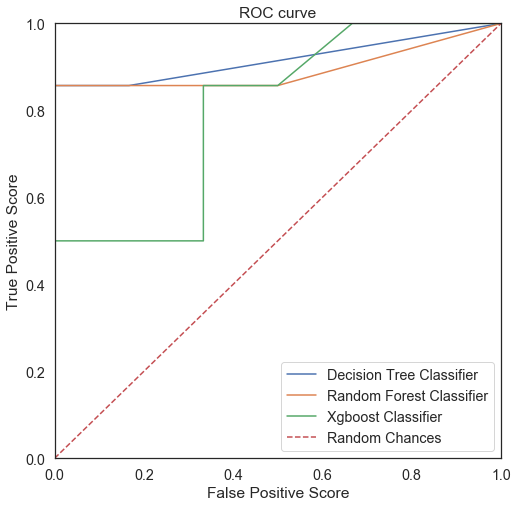

In [58]:
sns.set(style = 'white', font_scale = 1.3)
plt.figure(figsize = (8,8))
plt.plot(fpr_tree, tpr_tree, label = 'Decision Tree Classifier')
plt.plot(fpr_forest, tpr_forest, label = 'Random Forest Classifier')
plt.plot(fpr_xgboost, tpr_xgboost, label = 'Xgboost Classifier')
plt.plot([0, 1], [0, 1],'r--', label = "Random Chances")
plt.title('ROC curve')
plt.xlabel('False Positive Score')
plt.ylabel('True Positive Score')
plt.legend(loc = 'lower right')
plt.xlim(0,1)
plt.ylim(0,1)

From ROC curve we can see that each model has rather high performance, but it looks like decision tree classifier once again has the best performance (based on this metric) To be sure that decision tree has the best score, the AUC score will be calculated below 

### AUC score

In [59]:
from sklearn.metrics import roc_auc_score

In [70]:
auc_tree = roc_auc_score(y_test, y_pred_tree_prob[:, 1])
auc_forest = roc_auc_score(y_test, y_pred_forest_proba[:, 1])
auc_xgboost = roc_auc_score(y_test, y_pred_xgboost_proba[:, 1])

In [148]:
pd.DataFrame({'Model' :['Random forest', 'Decision tree', 'Xgboost'], 'Score': [auc_forest,auc_tree, auc_xgboost]}).sort_values(by = 'Score', ascending = False)

,Model,Score
1,Decision tree,0.916667
0,Random forest,0.892857
2,Xgboost,0.797619


As we can see from information provided above decision tree shows the best result with AUC score: **0.917**

# Summary

For the purpose of the target variable prediction three different models were created:

* Decision tree classifier;
* Random forest classifier;
* Xgboost classifier;

During some stages of the modeling process several problems arose. The first problem is that this dataset is not very balanced with respect to the target variable. This problem was solved by stratified sampling during train/test splits

> Stratified sampling aims at splitting a data set so that each split is similar with respect to something. In a classification setting, it is often chosen to ensure that the train and test sets have approximately the same percentage of samples of each target class as the complete set

 In order to solve problems with overfitting the hyperparameters tuning was done using randomized search with k-fold cross validation with 5 folds. 

One of the biggest problems of this particular dataset is the volume of available data. There are only 100 observations available. After splitting data to the training and testing datasets (80 % | 20 %) there is not much data for testing the model’s performance (only 20 observations). This can potentially harm the evaluation of model performance. Another splitting strategy (e.g. 70 % | 30 %) will harm model performance because model will be trained on less data. To reduce the impact of the small amount of data available, some evaluation metrics were measured with the help of k-fold cross validation.

To summarize, all three models performed rather well and showed high predictive power on the test data sets. Based on F1 score, accuracy score and AUC score the best model here was simple **Decision tree classification model**. According to the results we can say that in order to predict whether a person will be professional blogger or not (based on given features) there is no need of any complex models such as **Random forest** or **Xgboost**.